<a href="https://colab.research.google.com/github/celso-rojas/SSF-Oto24-CelsoRojasPerez/blob/main/Tarea__9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
ruta_archivo = '/content/drive/MyDrive/SSF/S1_Dataset.csv'
df = pd.read_csv(ruta_archivo)
print(df)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     Sex  Age  BADS-SF  BADS-SF_Activation  BADS-SF_Avoidance  CES-D  \
0      2   20       37                  22                  3      1   
1      2   18       33                  17                  2      2   
2      1   19       30                  20                  8      2   
3      1   19       23                  11                  6      3   
4      2   18       35                  19                  2      3   
..   ...  ...      ...                 ...                ...    ...   
216    1   19       21                  12                  9     36   
217    2   18        3                   0                 15     36   
218    2   23        1                   1                 18     40   
219    1   18        9                   4                 13     42   
220    2   21       16                  10                 12     49   

     W

<Figure size 1200x1200 with 0 Axes>

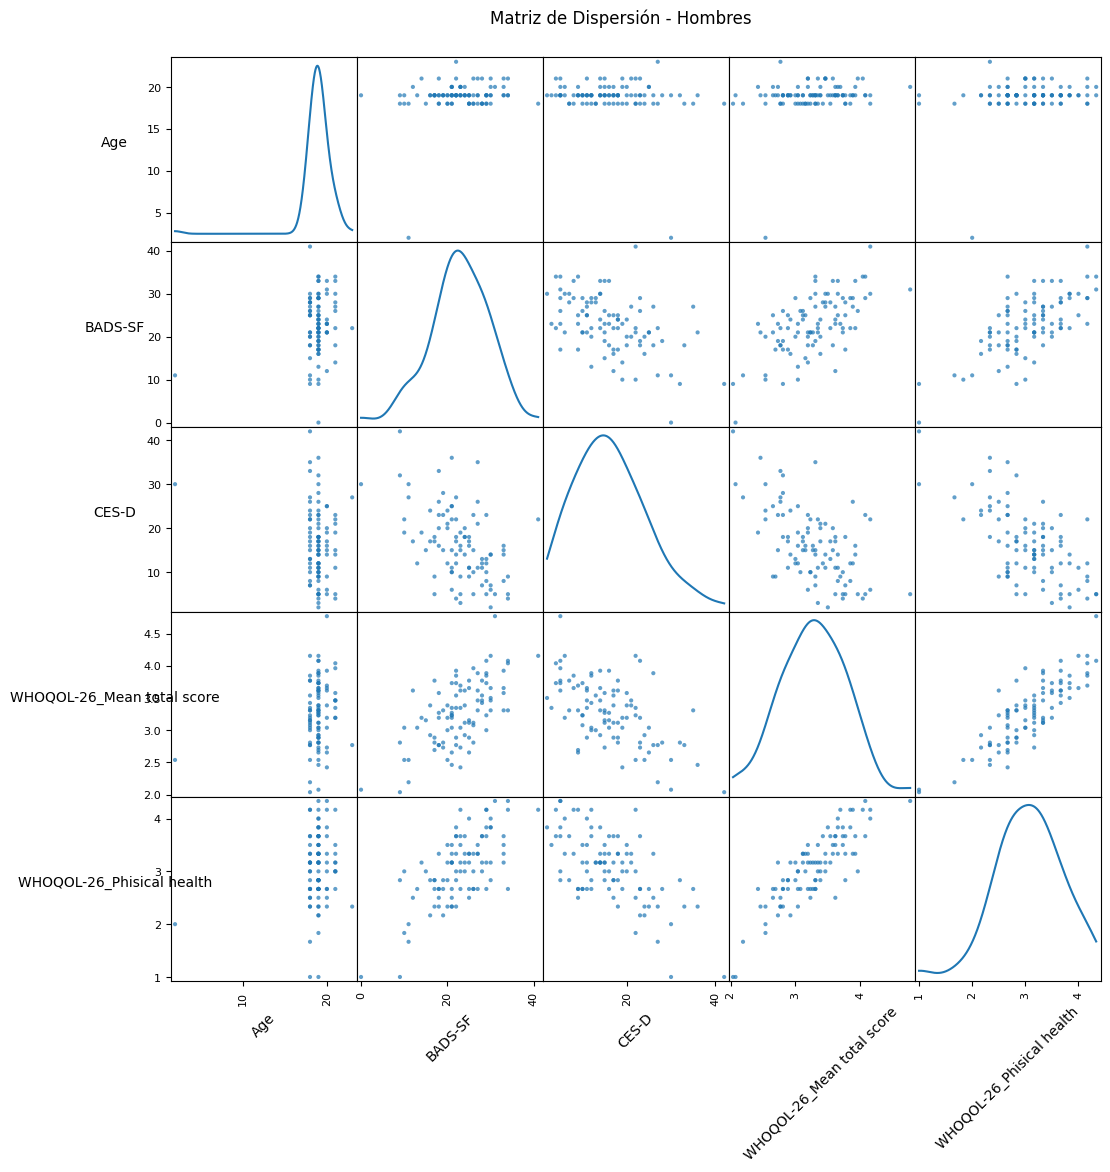

<Figure size 1200x1200 with 0 Axes>

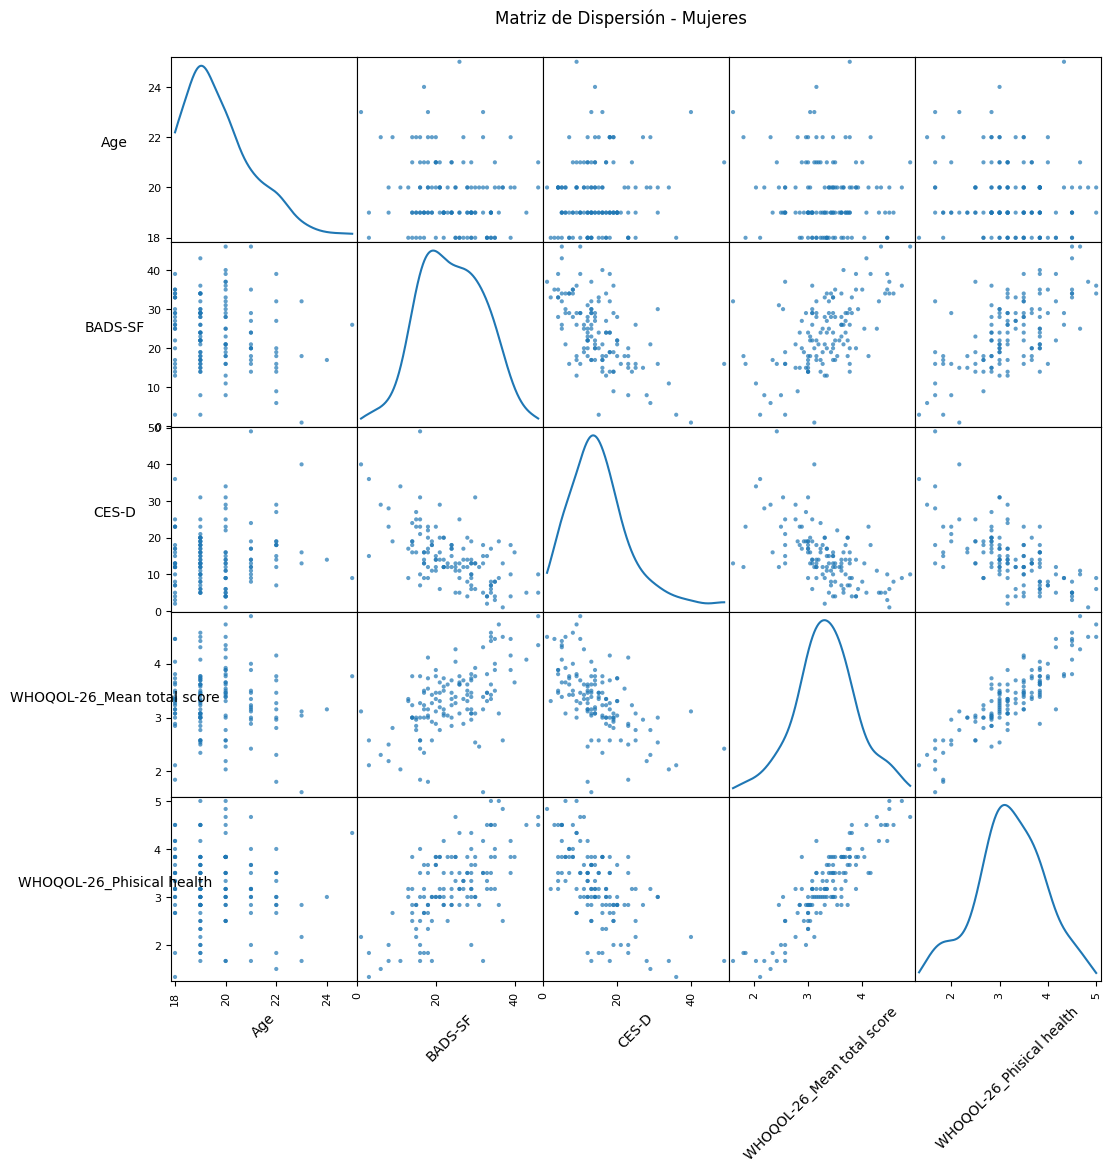

In [10]:
# matriz de dispersión
# Filtrar los datos por género (1 = Hombre, 2 = Mujer)
hombres = df[df['Sex'] == 1]
mujeres = df[df['Sex'] == 2]

# Seleccionar un subconjunto de variables clave para evitar saturación
variables_clave = [
    'Age', 'BADS-SF', 'CES-D',
    'WHOQOL-26_Mean total score', 'WHOQOL-26_Phisical health'
]

# Crear matriz de dispersión para hombres con mejoras
plt.figure(figsize=(12, 12))  # Ajustar tamaño del gráfico
scatter_matrix_hombres = pd.plotting.scatter_matrix(
    hombres[variables_clave], figsize=(12, 12), diagonal='kde', alpha=0.7
)
for ax in scatter_matrix_hombres.ravel():
    ax.xaxis.label.set_rotation(45)  # Rotar etiquetas en el eje x
    ax.yaxis.label.set_rotation(0)   # Mantener etiquetas del eje y horizontales
    ax.get_yaxis().set_label_coords(-0.3, 0.5)  # Ajustar posición de etiquetas y
plt.suptitle("Matriz de Dispersión - Hombres", y=0.92)
plt.show()

# Crear matriz de dispersión para mujeres con mejoras
plt.figure(figsize=(12, 12))  # Ajustar tamaño del gráfico
scatter_matrix_mujeres = pd.plotting.scatter_matrix(
    mujeres[variables_clave], figsize=(12, 12), diagonal='kde', alpha=0.7
)
for ax in scatter_matrix_mujeres.ravel():
    ax.xaxis.label.set_rotation(45)  # Rotar etiquetas en el eje x
    ax.yaxis.label.set_rotation(0)   # Mantener etiquetas del eje y horizontales
    ax.get_yaxis().set_label_coords(-0.3, 0.5)  # Ajustar posición de etiquetas y
plt.suptitle("Matriz de Dispersión - Mujeres", y=0.92)
plt.show()


In [14]:
from scipy.stats import ttest_ind
#Queremos analizar si existe una diferencia estadísticamente
#significativa en el puntaje promedio de calidad de vida entre hombres y mujeres.
# Filtrar los datos por género
hombres = df[df['Sex'] == 1]
mujeres = df[df['Sex'] == 2]

# Realizar prueba t de dos muestras para la variable seleccionada
stat, p_value = ttest_ind(hombres['WHOQOL-26_Mean total score'], mujeres['WHOQOL-26_Mean total score'], equal_var=False)

print("Prueba t de Student: comparación entre hombres y mujeres")
print(f"Estadístico t: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")
if p_value < 0.05:
    print("Hay una diferencia significativa entre hombres y mujeres (p < 0.05).")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula (p >= 0.05).")


Prueba t de Student: comparación entre hombres y mujeres
Estadístico t: -0.7149
p-valor: 0.4754
No hay evidencia suficiente para rechazar la hipótesis nula (p >= 0.05).


In [15]:
from scipy.stats import ttest_ind
#En este caso, estamos interesados ​​en comparar dos grupos diferentes de una misma población
#(por ejemplo, menores de 20 años vs. mayores o iguales a 20 años).
# H_0:No hay diferencia en los puntajes promedio de calidad de vida entre los dos grupos de edad.
#H_1: Existe una diferencia en los puntajes promedio de calidad de vida entre los dos grupos de edad.
# Crear dos grupos basados en la edad
grupo_1 = df[df['Age'] < 20]
grupo_2 = df[df['Age'] >= 20]

# Realizar prueba t de dos muestras para la variable seleccionada
stat, p_value = ttest_ind(grupo_1['CES-D'], grupo_2['CES-D'], equal_var=False)

print("\nPrueba t de 2 muestras: comparación entre menores y mayores de 20 años")
print(f"Estadístico t: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")
if p_value < 0.05:
    print("Hay una diferencia significativa entre los grupos (p < 0.05).")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula (p >= 0.05).")



Prueba t de 2 muestras: comparación entre menores y mayores de 20 años
Estadístico t: -0.1583
p-valor: 0.8745
No hay evidencia suficiente para rechazar la hipótesis nula (p >= 0.05).


 Planteamiento de la hipótesis
Aquí, queremos analizar si hay una diferencia significativa en los puntajes de calidad de vida antes y después del tratamiento para los mismos individuos .

Hipótesis nula:
No hay diferencia en los puntajes promedio de calidad de vida antes y después del tratamiento.


Hipótesis alternativa :
Existe una diferencia significativa en los puntajes promedio de calidad de vida antes y después del tratamiento.



In [16]:
from scipy.stats import ttest_rel

# Realizar prueba t pareada
stat, p_value = ttest_rel(df['WHOQOL-26_Phisical health'], df['WHOQOL-26_Psychological health'])

print("\nPrueba t pareada: comparación entre salud física y salud psicológica")
print(f"Estadístico t: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")
if p_value < 0.05:
    print("Hay una diferencia significativa entre las mediciones (p < 0.05).")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula (p >= 0.05).")



Prueba t pareada: comparación entre salud física y salud psicológica
Estadístico t: -7.9029
p-valor: 0.0000
Hay una diferencia significativa entre las mediciones (p < 0.05).


La regresión lineal nos ayuda a entender si existe una relación cuantificable entre dos variables. En este caso, nos ayuda a analizar si la dificultad en las actividades diarias (medida por BADS-SF) tiene un impacto en la calidad de vida (medida por WHOQOL-26_Mean total score).

                                OLS Regression Results                                
Dep. Variable:     WHOQOL-26_Mean total score   R-squared:                       0.352
Model:                                    OLS   Adj. R-squared:                  0.349
Method:                         Least Squares   F-statistic:                     119.2
Date:                        Sat, 30 Nov 2024   Prob (F-statistic):           1.97e-22
Time:                                05:01:36   Log-Likelihood:                -138.07
No. Observations:                         221   AIC:                             280.1
Df Residuals:                             219   BIC:                             286.9
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

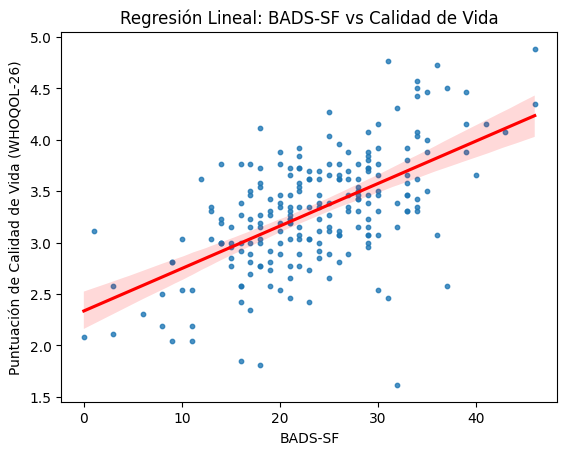

In [19]:

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


ruta_archivo = '/content/drive/MyDrive/SSF/S1_Dataset.csv'
df = pd.read_csv(ruta_archivo)



# Selección de variables para la regresión
# Asumimos que WHOQOL-26_Mean total score es nuestra variable dependiente (y)
# Tomamos "BADS-SF" como nuestra variable independiente (x)
X = df['BADS-SF']
y = df['WHOQOL-26_Mean total score']

# Añadimos una constante para el término de intersección (beta_0) en la regresión
X = sm.add_constant(X)

# Creamos el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Mostramos el resumen del modelo
print(model.summary())

# Visualizamos la relación entre las variables con un gráfico de dispersión
sns.regplot(x='BADS-SF', y='WHOQOL-26_Mean total score', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Regresión Lineal: BADS-SF vs Calidad de Vida')
plt.xlabel('BADS-SF')
plt.ylabel('Puntuación de Calidad de Vida (WHOQOL-26)')
plt.show()


En este análisis, se utilizó un modelo de regresión lineal múltiple para predecir el puntaje de calidad de vida, específicamente el WHOQOL-26_Mean total score, basado en un conjunto de variables predictoras obtenidas del conjunto de datos. Estas variables incluyen factores como la activación del BADS-SF, la evitación del BADS-SF, el puntaje CES-D (una medida de depresión), y otras características personales como la edad y el sexo de los individuos. El objetivo es identificar cómo estas variables afectan la calidad de vida general (medida por el WHOQOL-26_Mean total score).

Variables en el Análisis
El modelo intenta predecir la variable dependiente WHOQOL-26_Mean total score, que es una medida integral de la calidad de vida de los participantes. Las variables independientes consideradas en el modelo son:

BADS-SF_Activation: Un puntaje que refleja el nivel de activación de un individuo.
BADS-SF_Avoidance: Un puntaje que indica la tendencia a evitar ciertas situaciones o actividades.
CES-D: Un puntaje que mide los síntomas de depresión en los participantes.
Edad: La edad de los participantes.
Sexo: El sexo de los participantes.
Resultados de la Regresión Lineal
Se evaluaron tres modelos diferentes para examinar el impacto de las variables predictoras en la calidad de vida, obteniendo los siguientes resultados:

1. Modelo 1:

Coeficientes: [0.0349, -0.0099, -0.0278]
Intercepto: 3.35
R²: 0.459 (explica el 46% de la variabilidad)
MSE: 0.171 (error moderado)
Interpretación: Modelo con una relación moderada entre las variables predictoras y la calidad de vida.
2. Modelo 2:


Coeficientes: [0.3118, 0.3982, 0.1897]
Intercepto: 0.32
R²: 0.920 (explica el 92% de la variabilidad)
MSE: 0.025 (error bajo)
Interpretación: El mejor modelo, con una fuerte capacidad predictiva y un buen ajuste de los datos.
3. Modelo 3:


Coeficientes: [0.0045, -0.0320, 0.7107]
Intercepto: 1.11
R²: 0.754 (explica el 75.4% de la variabilidad)
MSE: 0.078 (error moderado)
Interpretación: Buen ajuste, pero no tan fuerte como el Modelo 2.
Conclusión: El Modelo 2 es el más efectivo para predecir el puntaje de calidad de vida, con un alto R² y bajo MSE, lo que sugiere que las variables predictoras utilizadas tienen un fuerte impacto en la calidad de vida.

Model 1 - Coeficientes: [ 0.0349044  -0.00985006 -0.0278111 ], Intercepto: 3.354390194538806
R²: 0.459, MSE: 0.171
--------------------------------------------------
Model 2 - Coeficientes: [0.31175428 0.39816615 0.18966831], Intercepto: 0.32125839047300264
R²: 0.920, MSE: 0.025
--------------------------------------------------
Model 3 - Coeficientes: [ 0.00450763 -0.03202644  0.71073818], Intercepto: 1.1062482899910115
R²: 0.754, MSE: 0.078
--------------------------------------------------


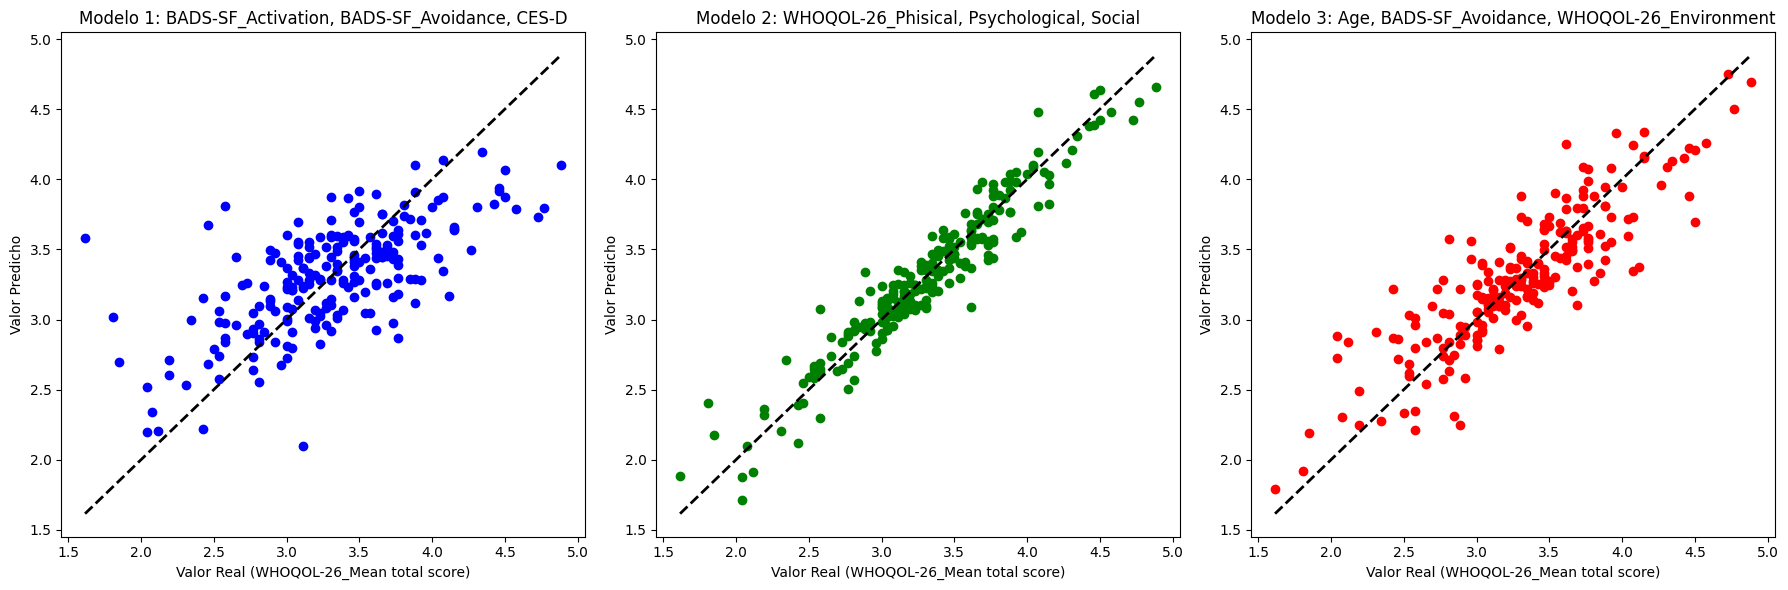

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/content/drive/MyDrive/SSF/S1_Dataset.csv')
# Limpieza de datos: eliminar filas con valores faltantes
data_clean = data.dropna()

# Probar diferentes combinaciones de variables

# Combinación 1: BADS-SF_Activation, BADS-SF_Avoidance, CES-D
X1 = data_clean[['BADS-SF_Activation', 'BADS-SF_Avoidance', 'CES-D']]
y1 = data_clean['WHOQOL-26_Mean total score']

# Combinación 2: WHOQOL-26_Phisical health, WHOQOL-26_Psychological health, WHOQOL-26_Social relationships
X2 = data_clean[['WHOQOL-26_Phisical health', 'WHOQOL-26_Psychological health', 'WHOQOL-26_Social relationships']]
y2 = data_clean['WHOQOL-26_Mean total score']

# Combinación 3: Age, BADS-SF_Avoidance, WHOQOL-26_Environment
X3 = data_clean[['Age', 'BADS-SF_Avoidance', 'WHOQOL-26_Environment']]
y3 = data_clean['WHOQOL-26_Mean total score']

# Crear un diccionario para almacenar los modelos y resultados
models = {}
results = {}

# Función para ajustar el modelo y evaluar el ajuste
def fit_and_evaluate(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Coeficientes y ajuste del modelo
    coef = model.coef_
    intercept = model.intercept_
    r2 = model.score(X, y)
    mse = mean_squared_error(y, y_pred)

    return coef, intercept, r2, mse, y_pred

# Evaluar los tres modelos
models['Model 1'] = fit_and_evaluate(X1, y1)
models['Model 2'] = fit_and_evaluate(X2, y2)
models['Model 3'] = fit_and_evaluate(X3, y3)

# Mostrar los resultados de los tres modelos
for model_name, result in models.items():
    coef, intercept, r2, mse, _ = result
    print(f"{model_name} - Coeficientes: {coef}, Intercepto: {intercept}")
    print(f"R²: {r2:.3f}, MSE: {mse:.3f}")
    print("-" * 50)

# Graficar los resultados
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Graficar Modelo 1
ax[0].scatter(y1, models['Model 1'][4], color='blue')
ax[0].plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'k--', lw=2)
ax[0].set_xlabel('Valor Real (WHOQOL-26_Mean total score)')
ax[0].set_ylabel('Valor Predicho')
ax[0].set_title('Modelo 1: BADS-SF_Activation, BADS-SF_Avoidance, CES-D')

# Graficar Modelo 2
ax[1].scatter(y2, models['Model 2'][4], color='green')
ax[1].plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'k--', lw=2)
ax[1].set_xlabel('Valor Real (WHOQOL-26_Mean total score)')
ax[1].set_ylabel('Valor Predicho')
ax[1].set_title('Modelo 2: WHOQOL-26_Phisical, Psychological, Social')

# Graficar Modelo 3
ax[2].scatter(y3, models['Model 3'][4], color='red')
ax[2].plot([y3.min(), y3.max()], [y3.min(), y3.max()], 'k--', lw=2)
ax[2].set_xlabel('Valor Real (WHOQOL-26_Mean total score)')
ax[2].set_ylabel('Valor Predicho')
ax[2].set_title('Modelo 3: Age, BADS-SF_Avoidance, WHOQOL-26_Environment')

plt.tight_layout()
plt.show()


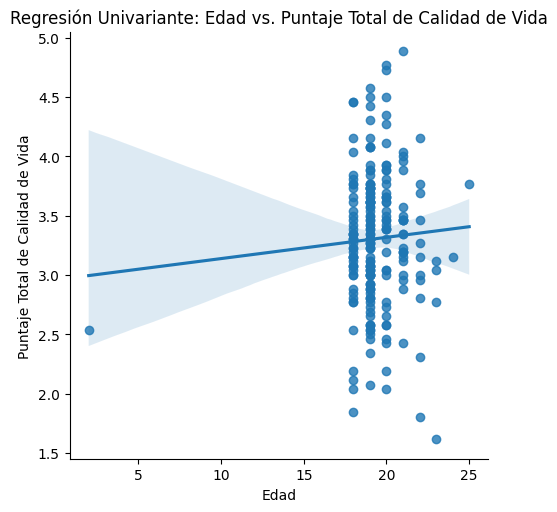

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt



# Creación del gráfico de regresión univariante
sns.lmplot(x='Age', y='WHOQOL-26_Mean total score', data=df)

# Títulos y etiquetas
plt.title('Regresión Univariante: Edad vs. Puntaje Total de Calidad de Vida')
plt.xlabel('Edad')
plt.ylabel('Puntaje Total de Calidad de Vida')

# Mostrar gráfico
plt.show()
